In [1]:
import nibabel as nib
import nibabel.processing as nibproc
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

/home/sachin/Documents/iitropar_academics/MTP/code/backup/my_pix2pix/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
def preprocess(path):
    size = 256
    img = nib.load(path)
    img = img.get_fdata()
    orig = img.copy()
    
    if img.shape[0] > size:
        img = img[0:size, :, :]

    if img.shape[1] > size:
        img = img[:, 0:size, :]    
    
    img_padded = np.full((size, size, img.shape[2]), np.min(img))
    x_offset = (size - img.shape[1]) // 2
    y_offset = (size - img.shape[0]) // 2
    img_padded[y_offset:y_offset + img.shape[0], x_offset:x_offset + img.shape[1], :] = img
    img = img_padded
    
    # gaussian norm
    mean = np.mean(img)
    std = np.std(img)
    img = (img - mean) / std
    
    # min-max norm
#     img = (img - np.min(img)) / (np.max(img) - np.min(img))

    return (orig, img)

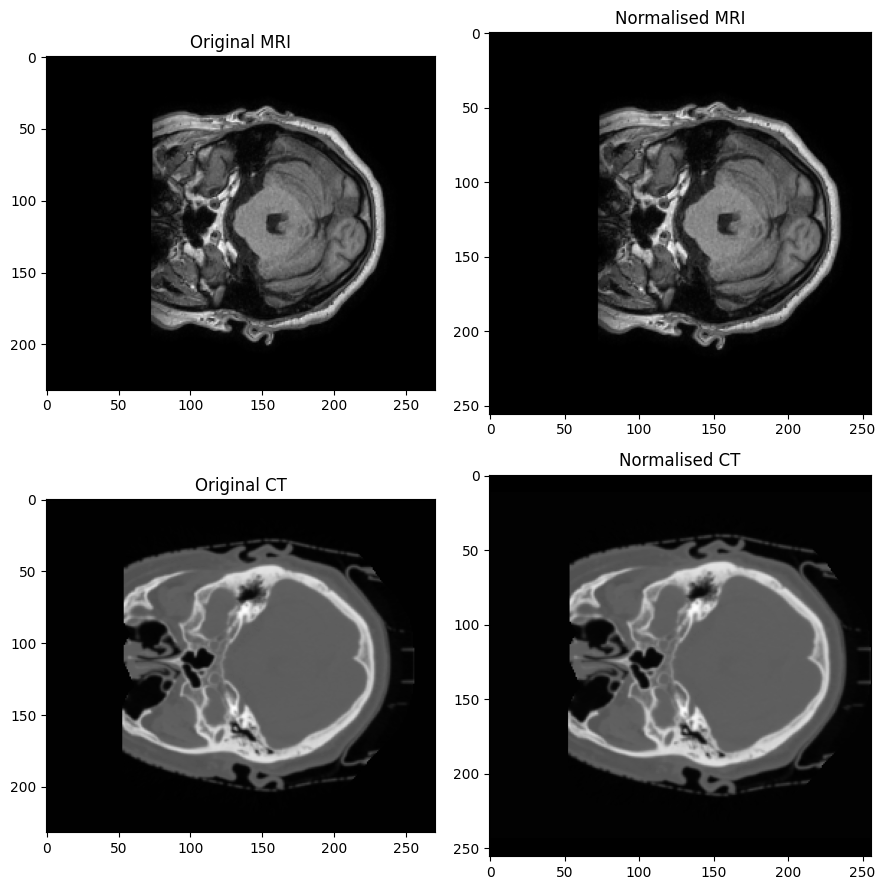

In [37]:
input_image_path = "Task1/train/1BA005/mr.nii.gz"
target_image_path = "Task1/train/1BA005/ct.nii.gz"
mask_image_path = "Task1/val/1BA075/mask.nii.gz"

# NORM WITH MASK
oinp, inp = preprocess(input_image_path)
otarget, target = preprocess(target_image_path)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9,9))
axes[0,0].imshow(oinp[:,:,80], cmap='gray')
axes[0,0].set_title('Original MRI')

axes[0,1].imshow(inp[:,:,80], cmap='gray')
axes[0,1].set_title('Normalised MRI')

axes[1,0].imshow(otarget[:,:,80], cmap='gray')
axes[1,0].set_title('Original CT')

axes[1,1].imshow(target[:,:,80], cmap='gray')
axes[1,1].set_title('Normalised CT')

plt.tight_layout()
plt.show()

# plt.imshow(target_slice, cmap='gray')
# plt.colorbar()
# plt.title("CT Scan")
# plt.show()